In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data load

In [2]:
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


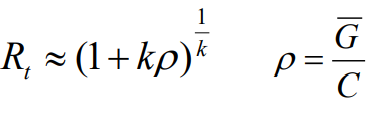

Если  ${\displaystyle R_{0}>1,}$, то на начальном этапе число заболевших будет расти экспоненциально.

Не является биологической константой для патогена, поскольку на него также влияют другие факторы, такие как условия окружающей среды и поведение инфицированного населения.

In [3]:
def R_0(a):
    G = 6.5     # как в лекции
    k = 16.25   # как в лекции
    ro = G * a
    if a <0:
        return 0
    return (1 + k*ro) ** (1/k)

In [4]:
def model_fit(x, y):
    a, b = np.polyfit(x=x, y=y, deg=1)
    return a, b 

# Italy

In [5]:
df_italy = df.loc[(df['location'] == 'Italy') & (df['date'] < '2020-03-15')] .set_index('date')['new_cases']

In [6]:
df_italy

date
2020-01-31       2.0
2020-02-01       0.0
2020-02-02       0.0
2020-02-03       0.0
2020-02-04       0.0
2020-02-05       0.0
2020-02-06       0.0
2020-02-07       1.0
2020-02-08       0.0
2020-02-09       0.0
2020-02-10       0.0
2020-02-11       0.0
2020-02-12       0.0
2020-02-13       0.0
2020-02-14       0.0
2020-02-15       0.0
2020-02-16       0.0
2020-02-17       0.0
2020-02-18       0.0
2020-02-19       0.0
2020-02-20       0.0
2020-02-21      17.0
2020-02-22      42.0
2020-02-23      93.0
2020-02-24      74.0
2020-02-25      93.0
2020-02-26     131.0
2020-02-27     202.0
2020-02-28     233.0
2020-02-29     240.0
2020-03-01     566.0
2020-03-02     342.0
2020-03-03     466.0
2020-03-04     587.0
2020-03-05     769.0
2020-03-06     778.0
2020-03-07    1247.0
2020-03-08    1492.0
2020-03-09    1797.0
2020-03-10     977.0
2020-03-11    2313.0
2020-03-12    2651.0
2020-03-13    2547.0
2020-03-14    3497.0
Name: new_cases, dtype: float64

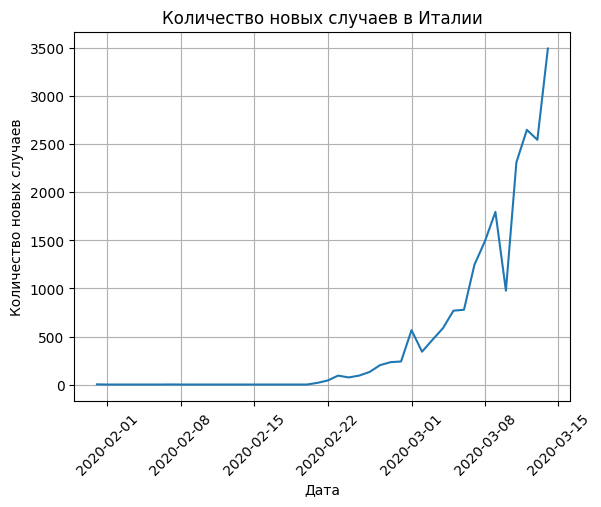

In [7]:
plt.plot(df_italy, label='Новые случаи')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel('Количество новых случаев')
plt.xlabel('Дата')
plt.title('Количество новых случаев в Италии')
plt.grid()
plt.show();

### С 2020-02-01

In [8]:
x = np.linspace(0, len(df_italy.index), num=len(df_italy.index))
LN = np.log(df_italy) #+1e-5
LN[LN == -np.inf] = 0

C:\Users\Максим\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
R_italy = []
for n in range(10, len(LN)):
    R_italy.append(R_0(model_fit(x[:n], LN[:n])[0]))    # первые n-дней

1.2196084053519447


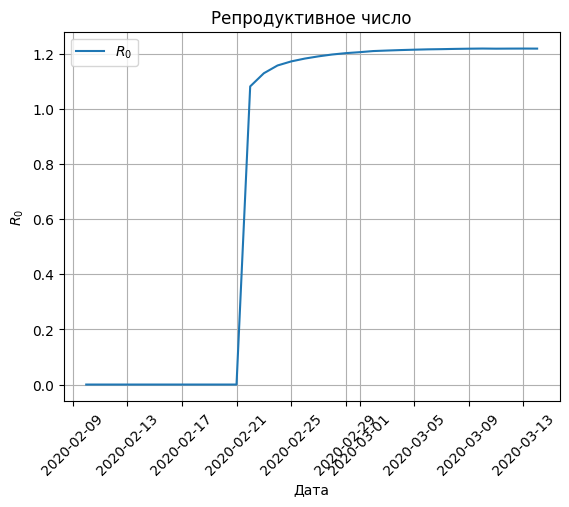

In [10]:
print(R_italy[-1])
plt.plot(df_italy.index[10:], R_italy, label='$R_0$')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel('$R_0$')
plt.title('Репродуктивное число')
plt.xlabel('Дата')
plt.legend()
plt.grid()
plt.show();

y = 0.23x + -1.85


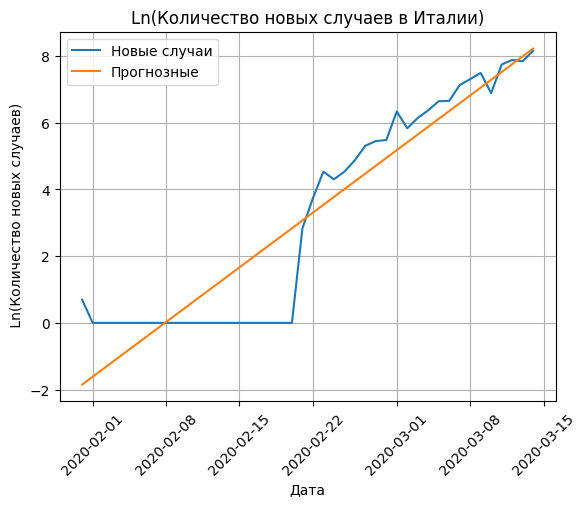

In [11]:
a, b = model_fit(x[:n], LN[:n])
print(f"y = {a:.2f}x + {b:.2f}")
plt.plot(LN, label='Новые случаи')
plt.plot(df_italy.index, a*x + b, label='Прогнозные')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel(' Ln(Количество новых случаев)')
plt.title('Ln(Количество новых случаев в Италии)')
plt.xlabel('Дата')
plt.legend()
plt.grid()
plt.show();

y = exp(0.23x + -1.85)


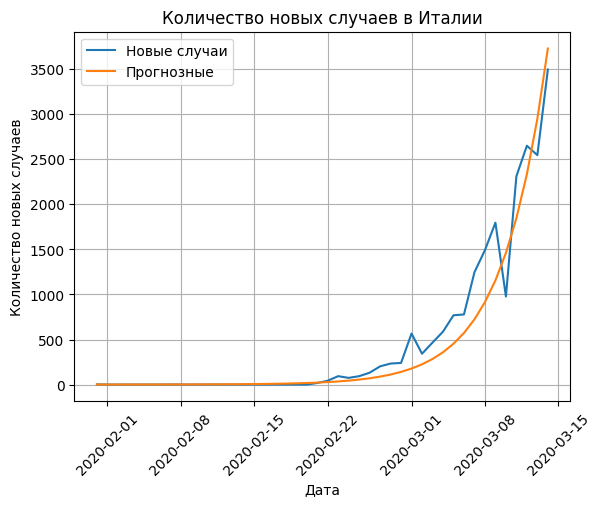

In [12]:
a, b = model_fit(x[:n], LN[:n])
print(f"y = exp({a:.2f}x + {b:.2f})")
plt.plot(df_italy, label='Новые случаи')
plt.plot(df_italy.index, np.exp(a*x + b), label='Прогнозные')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel('Количество новых случаев')
plt.xlabel('Дата')
plt.title('Количество новых случаев в Италии')
plt.grid()
plt.legend()
plt.show();

### С 2020-02-20

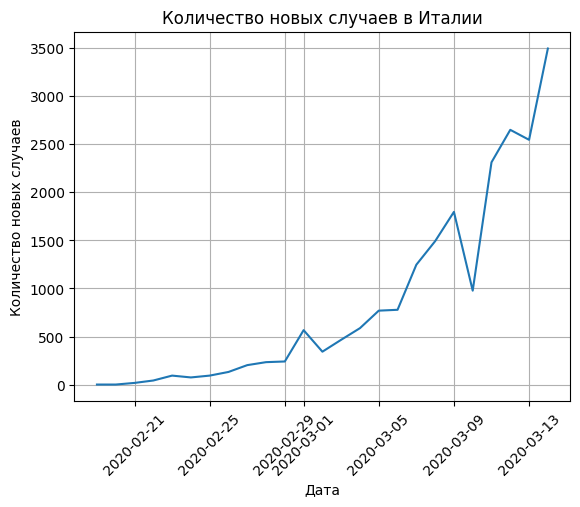

In [13]:
df_last_italy = df_italy['2020-02-19':]

plt.plot(df_last_italy, label='Новые случаи')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.title('Количество новых случаев в Италии')
plt.xlabel('Дата')
plt.ylabel('Количество новых случаев')
plt.grid()
plt.show();

In [14]:
x_1 = np.linspace(0, len(df_last_italy), num=len(df_last_italy))
LN_1 = np.log(df_last_italy) #+1e-5
LN_1[LN_1 == -np.inf] = 0

In [15]:
R_italy = []
for n in range(5, len(LN_1)):
    R_italy.append(R_0(model_fit(x_1[:n], LN_1[:n])[0]))    # первые n-дней

1.2303862078572791


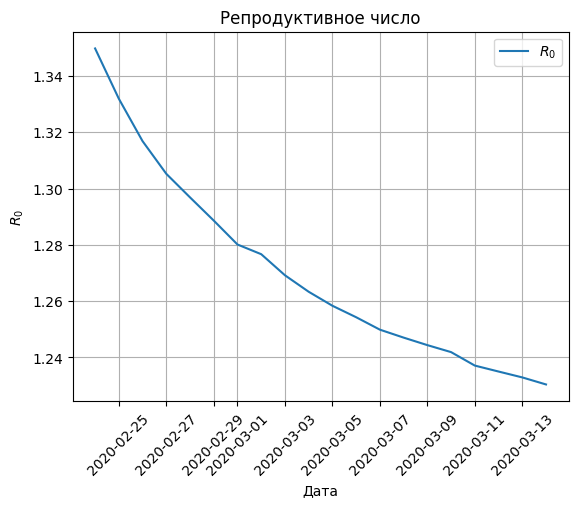

In [16]:
print(R_italy[-1])
plt.plot(df_last_italy.index[5:], R_italy, label='$R_0$')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.title('Репродуктивное число')
plt.ylabel('$R_0$')
plt.xlabel('Дата')
plt.grid()
plt.legend()
plt.show();

y = 0.27x + 2.29


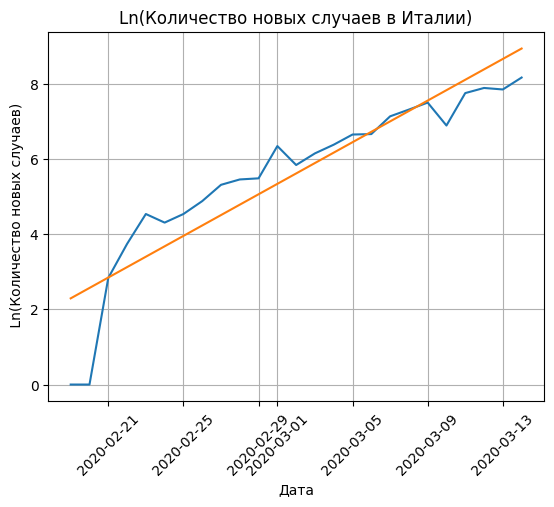

In [17]:
a, b = model_fit(x_1[:n], LN_1[:n])
print(f"y = {a:.2f}x + {b:.2f}")
plt.plot(LN_1, label='Новые случаи')
plt.plot(df_last_italy.index, a*x_1 + b)
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel(' Ln(Количество новых случаев)')
plt.title('Ln(Количество новых случаев в Италии)')
plt.xlabel('Дата')
plt.grid()
plt.show();

y = exp(0.27x + 2.29)


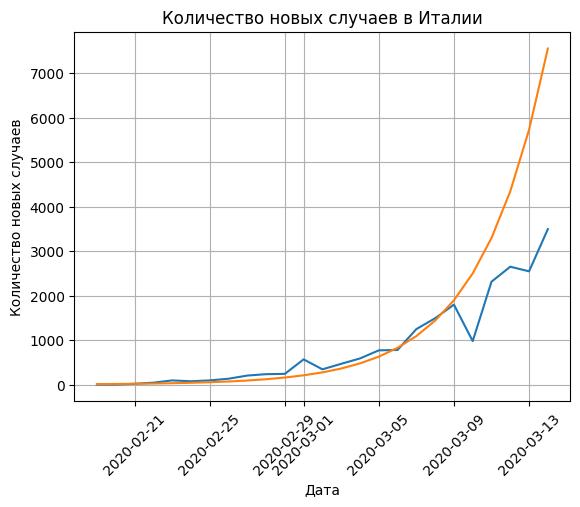

In [18]:
a, b = model_fit(x_1[:n], LN_1[:n])
print(f"y = exp({a:.2f}x + {b:.2f})")
plt.plot(df_last_italy, label='Новые случаи')
plt.plot(df_last_italy.index, np.exp(a*x_1 + b))
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel('Количество новых случаев')
plt.title('Количество новых случаев в Италии')
plt.xlabel('Дата')
plt.grid()
plt.show();

# Germany

In [19]:
df_germany = df.loc[(df['location'] == 'Germany') & (df['date'] < '2020-03-15')] .set_index('date')['new_cases']

In [20]:
df_germany

date
2020-01-27      1.0
2020-01-28      3.0
2020-01-29      0.0
2020-01-30      0.0
2020-01-31      1.0
2020-02-01      3.0
2020-02-02      2.0
2020-02-03      2.0
2020-02-04      0.0
2020-02-05      0.0
2020-02-06      0.0
2020-02-07      1.0
2020-02-08      0.0
2020-02-09      1.0
2020-02-10      0.0
2020-02-11      2.0
2020-02-12      0.0
2020-02-13      0.0
2020-02-14      0.0
2020-02-15      0.0
2020-02-16      0.0
2020-02-17      0.0
2020-02-18      0.0
2020-02-19      0.0
2020-02-20      0.0
2020-02-21      0.0
2020-02-22      0.0
2020-02-23      0.0
2020-02-24      0.0
2020-02-25      0.0
2020-02-26      5.0
2020-02-27      5.0
2020-02-28     27.0
2020-02-29     13.0
2020-03-01     51.0
2020-03-02     33.0
2020-03-03     38.0
2020-03-04     52.0
2020-03-05    109.0
2020-03-06    185.0
2020-03-07    150.0
2020-03-08    163.0
2020-03-09    265.0
2020-03-10    184.0
2020-03-11    271.0
2020-03-12    802.0
2020-03-13    693.0
2020-03-14    733.0
Name: new_cases, dtype: float64

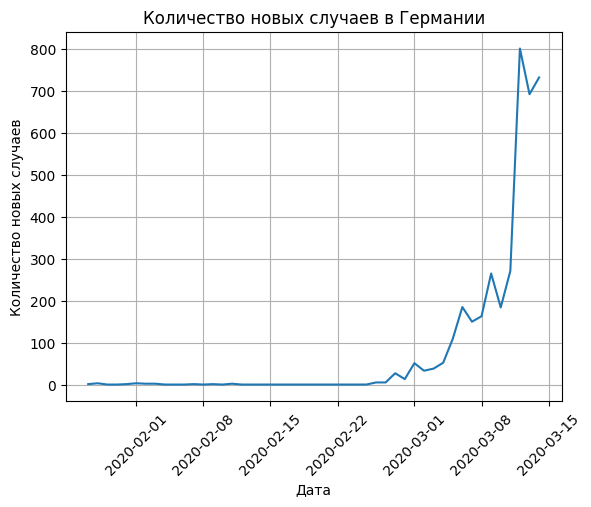

In [21]:
plt.plot(df_germany, label='Новые случаи')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel('Количество новых случаев')
plt.xlabel('Дата')
plt.title('Количество новых случаев в Германии')
plt.grid()
plt.show();

In [22]:
x = np.linspace(0, len(df_germany.index), num=len(df_germany.index))
LN = np.log(df_germany) #+1e-5
LN[LN == -np.inf] = 0

C:\Users\Максим\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
R_germany = []
for n in range(10, len(LN)):
    R_germany.append(R_0(model_fit(x[:n], LN[:n])[0]))    # первые n-дней

1.1802044725841119


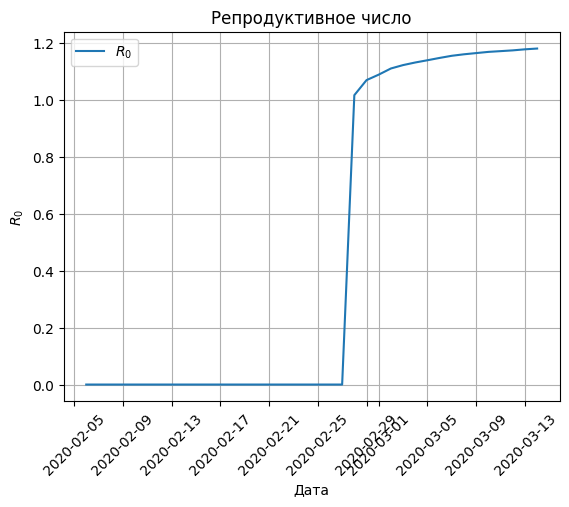

In [24]:
print(R_germany[-1])
plt.plot(df_germany.index[10:], R_germany, label='$R_0$')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel('$R_0$')
plt.title('Репродуктивное число')
plt.xlabel('Дата')
plt.legend()
plt.grid()
plt.show();

y = 0.13x + -1.40


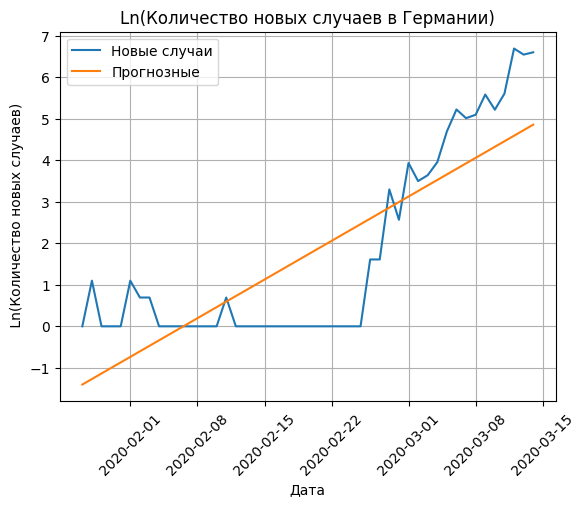

In [25]:
a, b = model_fit(x[:n], LN[:n])
print(f"y = {a:.2f}x + {b:.2f}")
plt.plot(LN, label='Новые случаи')
plt.plot(df_germany.index, a*x + b, label='Прогнозные')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel(' Ln(Количество новых случаев)')
plt.title('Ln(Количество новых случаев в Германии)')
plt.xlabel('Дата')
plt.legend()
plt.grid()
plt.show();

y = exp(0.13x + -1.40)


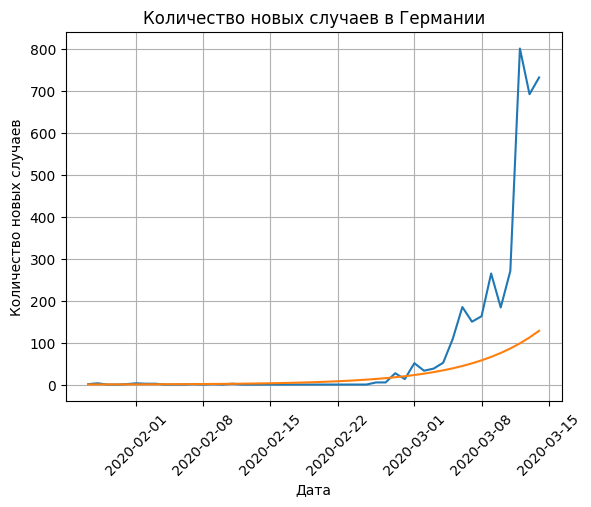

In [26]:
print(f"y = exp({a:.2f}x + {b:.2f})")
plt.plot(df_germany, label='Новые случаи')
plt.plot(df_germany.index, np.exp(a*x + b))
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel('Количество новых случаев')
plt.title('Количество новых случаев в Германии')
plt.xlabel('Дата')
plt.grid()
plt.show();

### С 2020-02-20

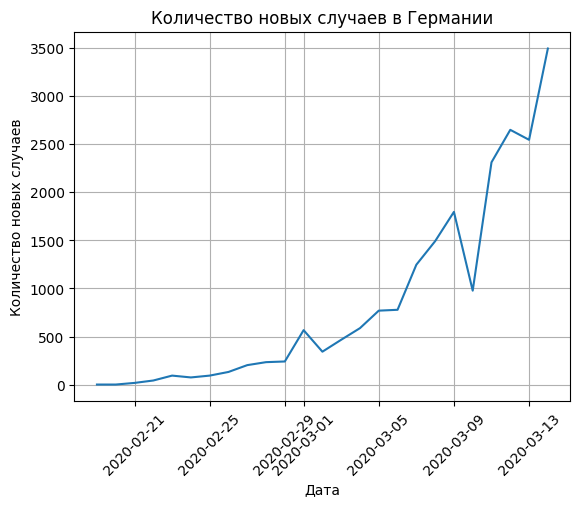

In [27]:
df_last_germany = df_italy['2020-02-19':]

plt.plot(df_last_germany, label='Новые случаи')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.title('Количество новых случаев в Германии')
plt.xlabel('Дата')
plt.ylabel('Количество новых случаев')
plt.grid()
plt.show();

In [28]:
x_1 = np.linspace(0, len(df_last_germany), num=len(df_last_germany))
LN_1 = np.log(df_last_germany) #+1e-5
LN_1[LN_1 == -np.inf] = 0

In [29]:
R_germany = []
for n in range(5, len(LN_1)):
    R_germany.append(R_0(model_fit(x_1[:n], LN_1[:n])[0]))    # первые n-дней

1.2303862078572791


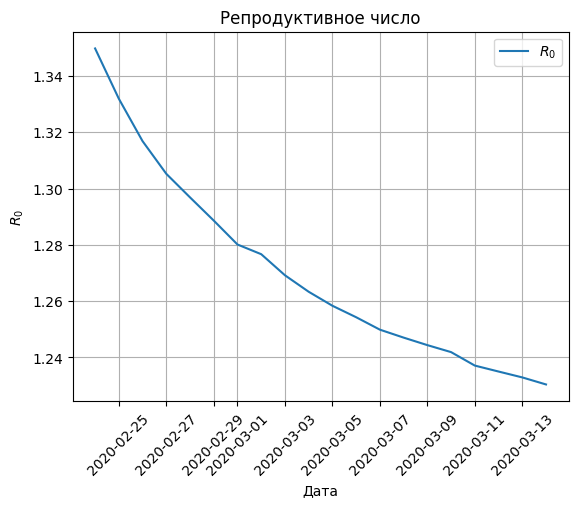

In [30]:
print(R_italy[-1])
plt.plot(df_last_germany.index[5:], R_italy, label='$R_0$')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.title('Репродуктивное число')
plt.ylabel('$R_0$')
plt.xlabel('Дата')
plt.grid()
plt.legend()
plt.show();

y = 0.27x + 2.29


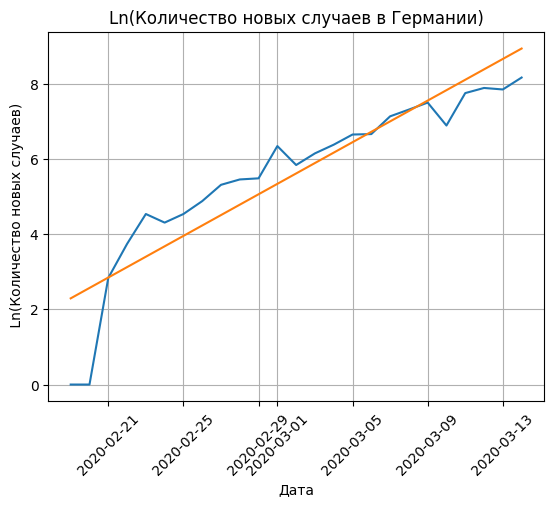

In [31]:
a, b = model_fit(x_1[:n], LN_1[:n])
print(f"y = {a:.2f}x + {b:.2f}")
plt.plot(LN_1, label='Новые случаи')
plt.plot(df_last_germany.index, a*x_1 + b)
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel(' Ln(Количество новых случаев)')
plt.title('Ln(Количество новых случаев в Германии)')
plt.xlabel('Дата')
plt.grid()
plt.show();

y = exp(0.27x + 2.29)


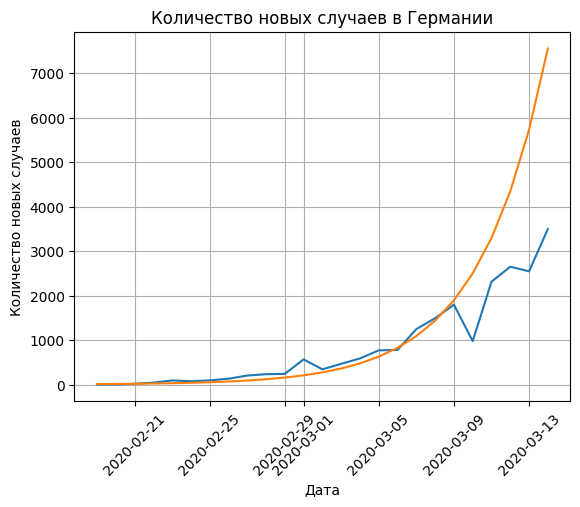

In [32]:
print(f"y = exp({a:.2f}x + {b:.2f})")
plt.plot(df_last_germany, label='Новые случаи')
plt.plot(df_last_germany.index, np.exp(a*x_1 + b))
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel('Количество новых случаев')
plt.title('Количество новых случаев в Германии')
plt.xlabel('Дата')
plt.grid()
plt.show();

### China

In [45]:
# df = pd.read_csv('wuhan.csv', parse_dates=['date'])
# df_china = df.loc[(df['date'] < '2020-02-12')] .set_index('date')['cases']
df = pd.read_csv('nc_wuhan.csv', parse_dates=['dates'])
df_china = df.loc[(df['dates'] < '2020-02-12')] .set_index('dates')['new_cases']

In [34]:
df_china

date
2020-01-24      495
2020-01-25      572
2020-01-26      618
2020-01-27      698
2020-01-28     1590
2020-01-29     1905
2020-01-30     2261
2020-01-31     2639
2020-02-01     3215
2020-02-02     4109
2020-02-03     5142
2020-02-04     6384
2020-02-05     8351
2020-02-06    10117
2020-02-07    11618
2020-02-08    13603
2020-02-09    14982
2020-02-10    16902
2020-02-11    18454
Name: cases, dtype: int64

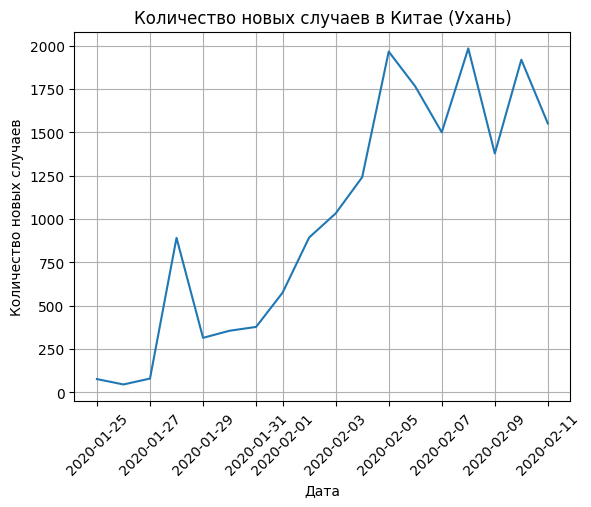

In [47]:
plt.plot(df_china, label='Новые случаи')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel('Количество новых случаев')
plt.xlabel('Дата')
plt.title('Количество новых случаев в Китае (Ухань)')
plt.grid()
plt.show();

In [48]:
x = np.linspace(0, len(df_china.index), num=len(df_china.index))
LN = np.log(df_china) #+1e-5
LN[LN == -np.inf] = 0

In [49]:
R_china = []
for n in range(2, len(LN)):
    R_china.append(R_0(model_fit(x[:n], LN[:n])[0]))    # первые n-дней

1.2099272718769352


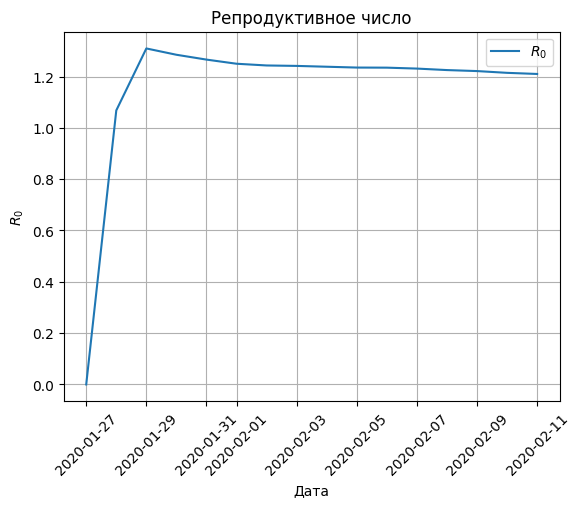

In [50]:
print(R_china[-1])
plt.plot(df_china.index[2:], R_china, label='$R_0$')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel('$R_0$')
plt.title('Репродуктивное число')
plt.xlabel('Дата')
plt.legend()
plt.grid()
plt.show();

y = 0.20x + 4.71


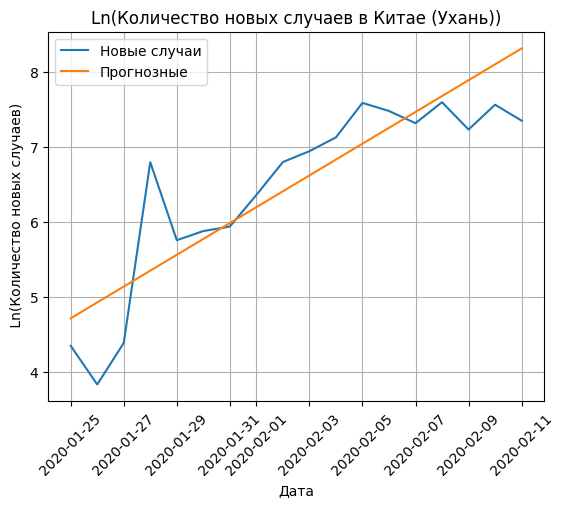

In [51]:
a, b = model_fit(x[:n], LN[:n])
print(f"y = {a:.2f}x + {b:.2f}")
plt.plot(LN, label='Новые случаи')
plt.plot(df_china.index, a*x + b, label='Прогнозные')
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel(' Ln(Количество новых случаев)')
plt.title('Ln(Количество новых случаев в Китае (Ухань))')
plt.xlabel('Дата')
plt.legend()
plt.grid()
plt.show();

y = exp(0.20x + 4.71)


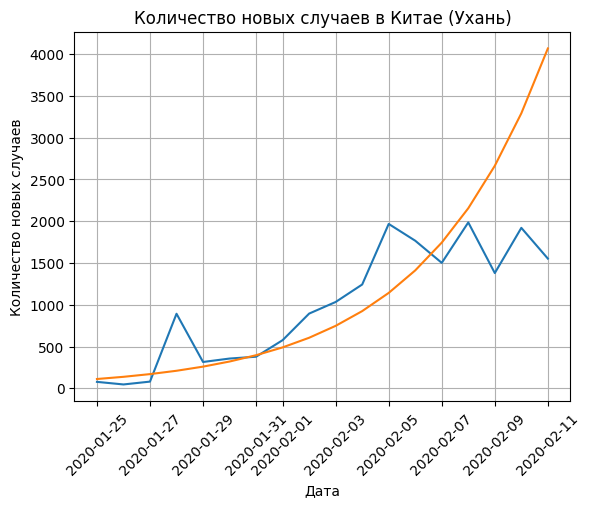

In [52]:
print(f"y = exp({a:.2f}x + {b:.2f})")
plt.plot(df_china, label='Новые случаи')
plt.plot(df_china.index, np.exp(a*x + b))
plt.tick_params(axis = 'x', labelrotation = 45)
plt.ylabel('Количество новых случаев')
plt.title('Количество новых случаев в Китае (Ухань)')
plt.xlabel('Дата')
plt.grid()
plt.show();